<a href="https://colab.research.google.com/github/anushkasingh2002/ML-Assignments/blob/main/ML_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment-4
# Naive Bayes Classifier

First we import libraries and read the file

In [ ]:
#Run this first to ensure all necessary libraries are imported beforehand
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

df = pd.read_excel("Data-NB.xlsx")
df.head()

,Lab-Test1(30),Lab-Test2(24),Midsem Test (90),Gender,Attendance,Grade
0,13.00,24,66.0,Male,High,A
1,15.00,24,67.0,Female,High,A
2,5.25,24,45.0,Male,High,B-
3,2.75,19,34.0,Male,Low,C-
4,7.25,24,30.0,Male,High,C-


In [ ]:
#Checking for null values
null_values = df.isnull().sum()
print("Null values:\n", null_values)

Null values:
 Lab-Test1(30)       0
Lab-Test2(24)       0
Midsem Test (90)    0
Gender              0
Attendance          0
Grade               0
dtype: int64


Here, we do not have any null values so we can proceed with DATA VISUALISATION


<Axes: xlabel='Grade', ylabel='Count'>

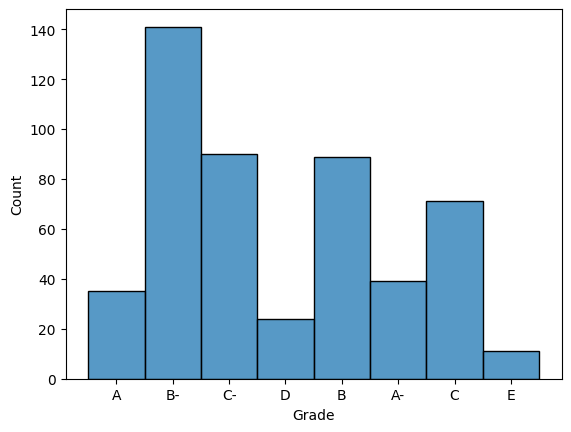

In [ ]:
import seaborn as sns
#PLotting histogram for Grades
Grade = df['Grade']
sns.histplot(data= Grade, bins=10)

In [ ]:
#Encoding for nominal variables
# Define mappings for attendance and grades
attendance_map = {'High': 3, 'Moderate': 2, 'Low': 1}
grade_map = {'A': 7, 'A-': 6, 'B': 5, 'B-': 4, 'C': 3, 'C-': 2, 'D': 1, 'E': 0}

# Encode Attendance and Grade features
df_encoded=df
df_encoded['Attendance_encoded'] = df_encoded['Attendance'].map(attendance_map)
df_encoded['Grade_encoded'] = df_encoded['Grade'].map(grade_map)

# Lambda function to encode Gender
df_encoded['Gender_encoded'] = df_encoded['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

# Drop the original columns
df_encoded = df_encoded.drop(['Attendance', 'Grade', 'Gender'], axis=1)

print(df_encoded)

     Lab-Test1(30)  Lab-Test2(24)  Midsem Test (90)  Attendance_encoded  \
0            13.00             24              66.0                   3   
1            15.00             24              67.0                   3   
2             5.25             24              45.0                   3   
3             2.75             19              34.0                   1   
4             7.25             24              30.0                   3   
..             ...            ...               ...                 ...   
495          10.50             24              48.0                   1   
496          11.00             24              31.0                   2   
497          11.75             24              47.0                   3   
498           0.00             20               0.0                   1   
499          13.75             24              53.0                   2   

     Grade_encoded  Gender_encoded  
0                7               1  
1                7       

# Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'df_encoded' is your dataframe with encoded features
X = df_encoded.drop('Grade_encoded', axis=1)  # Features
y = df_encoded['Grade_encoded']  # Target variable

# Split the dataset into training and testing sets (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the training and testing sets
print("Training set shape (X, y):", X_train.shape, y_train.shape)
print("Testing set shape (X, y):", X_test.shape, y_test.shape)


Training set shape (X, y): (350, 5) (350,)
Testing set shape (X, y): (150, 5) (150,)


Training Naive Bayes Classifier

In [ ]:
#Libraries already imported above
nb_classifier = GaussianNB()
y_pred = nb_classifier.fit(X_train, y_train).predict(X_test)

Evaluating Model

Accuracy: 0.72

Classification Report:
              precision    recall  f1-score   support

           1       0.86      0.86      0.86         7
           2       0.93      0.87      0.90        31
           3       0.57      0.38      0.46        21
           4       0.72      0.76      0.74        50
           5       0.50      0.83      0.62        18
           6       1.00      0.36      0.53        14
           7       0.75      1.00      0.86         9

    accuracy                           0.72       150
   macro avg       0.76      0.72      0.71       150
weighted avg       0.75      0.72      0.71       150



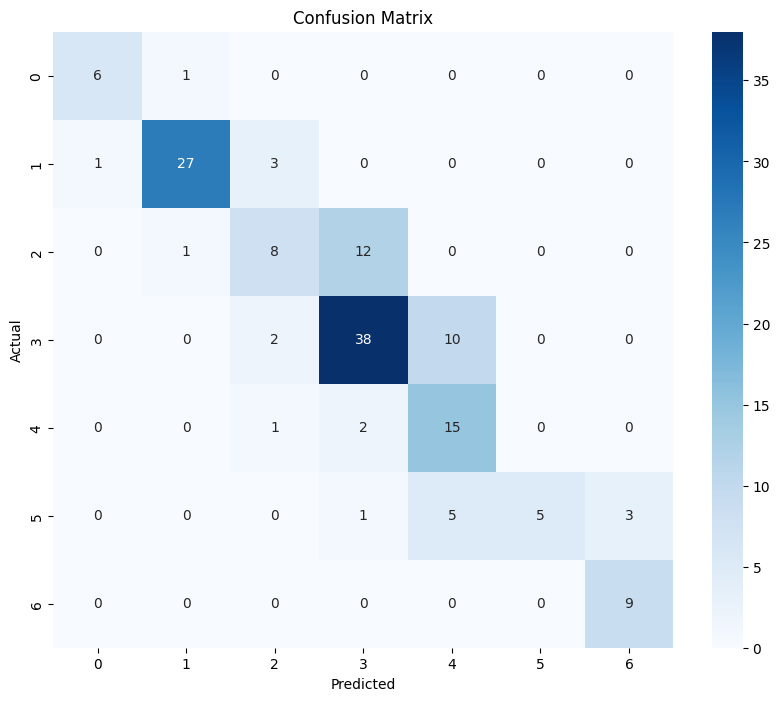

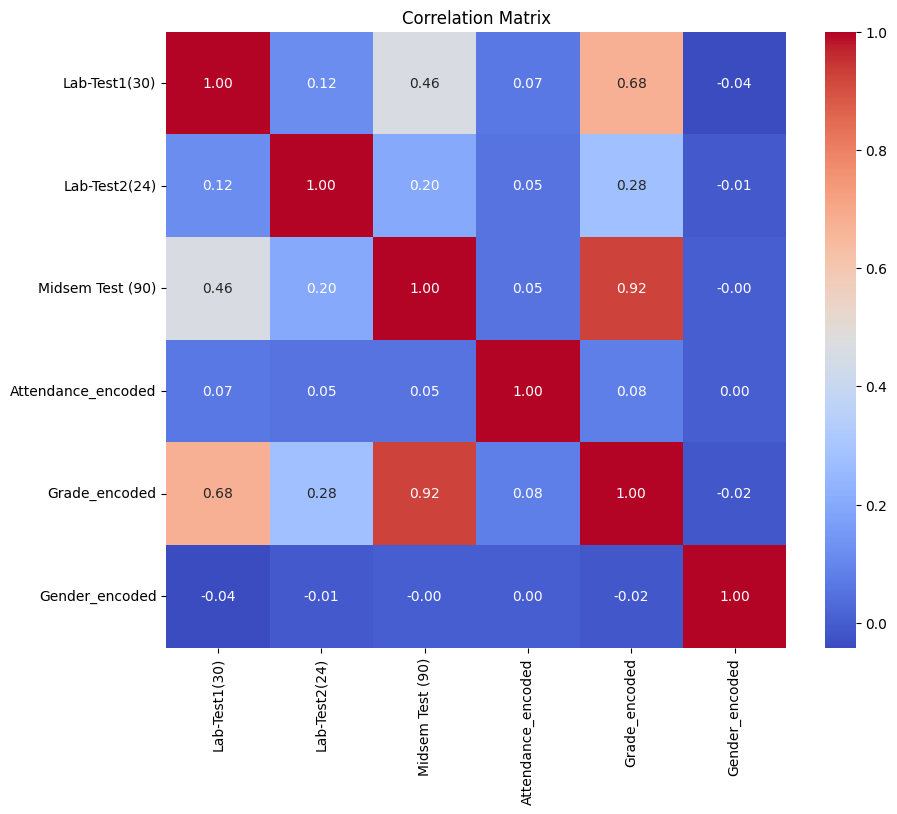

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Correlation matrix
corr_matrix = df_encoded.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Using Random Forest and Gradient Boosted DT

Installing libraries and setting up environment for Keras

In [ ]:
!pip install tensorflow_decision_forests
!pip install tf_keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 43.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 82.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 86.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 87.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 54.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 45.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 30.5 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found exist

In [ ]:
import os
# Keep using Keras 2
os.environ['TF_USE_LEGACY_KERAS'] = '1'

import tensorflow_decision_forests as tfdf
import tensorflow as tf

Splitting the dataset into Training and testing

In [ ]:
import numpy as np
def split_dataset(dataset, test_ratio=0.30):
    """Splits a pandas DataFrame into training and testing sets."""
    test_indices = np.random.rand(len(dataset)) < test_ratio
    return dataset[~test_indices], dataset[test_indices]

# Assuming you have a pandas DataFrame named df_encoded
train_ds_pd, test_ds_pd = split_dataset(df_encoded)
print("{} examples in training, {} examples for testing.".format(len(train_ds_pd), len(test_ds_pd)))


376 examples in training, 124 examples for testing.


We convert the given dataframes into Tensor flow dataframes

In [ ]:
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label="Grade_encoded")
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_ds_pd, label="Grade_encoded")

In [ ]:
# Specify the model.
model_rf = tfdf.keras.RandomForestModel(task=tfdf.keras.Task.CLASSIFICATION, num_trees=30, verbose=2)

# Train the model.
model_rf.fit(train_ds)

Use 2 thread(s) for training
Use /tmp/tmp0xylwrum as temporary training directory
Reading training dataset...
Training tensor examples:
Features: {'Lab-Test1(30)': <tf.Tensor 'data:0' shape=(None,) dtype=float64>, 'Lab-Test2(24)': <tf.Tensor 'data_1:0' shape=(None,) dtype=int64>, 'Midsem_Test_(90)': <tf.Tensor 'data_2:0' shape=(None,) dtype=float64>, 'Attendance_encoded': <tf.Tensor 'data_3:0' shape=(None,) dtype=int64>, 'Gender_encoded': <tf.Tensor 'data_4:0' shape=(None,) dtype=int64>}
Label: Tensor("data_5:0", shape=(None,), dtype=int64)
Weights: None
Normalized tensor features:
 {'Lab-Test1(30)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast:0' shape=(None,) dtype=float32>), 'Lab-Test2(24)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_1:0' shape=(None,) dtype=float32>), 'Midsem_Test_(90)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_2:0' shape=(None,) dtype=float32>), 'Attendance_encoded': Semantic

[INFO 24-04-05 15:58:54.9893 UTC kernel.cc:771] Start Yggdrasil model training
[INFO 24-04-05 15:58:54.9894 UTC kernel.cc:772] Collect training examples
[INFO 24-04-05 15:58:54.9895 UTC kernel.cc:785] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

[INFO 24-04-05 15:58:54.9901 UTC kernel.cc:391] Number of batches: 1
[INFO 24-04-05 15:58:54.9901 UTC kernel.cc:392] Number of examples: 376
[INFO 24-04-05 15:58:54.9902 UTC kernel.cc:792] Training dataset:
Number of records: 376
Number of columns: 6

Number of columns by type:
	NUMERICAL: 5 (83.3333%)
	CATEGORICAL: 1 (16.6667%)

Columns:

NUMERICAL: 5 (83.3333%)
	0: "Attendance_encoded" NUMERICAL mean:2.56915 min:1 max:3 s

Model trained in 0:00:00.197445
Compiling model...
Model compiled.


In [ ]:
#evaluating accuracy on test dataset

model_rf.compile(metrics=["accuracy"])
evaluation = model_rf.evaluate(test_ds, return_dict=True)
print()

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

1/1 [==============================] - 5s 5s/step - loss: 0.0000e+00 - accuracy: 0.8468

loss: 0.0000
accuracy: 0.8468


# GBDT

Training Model

In [ ]:
model_gbdt = tfdf.keras.GradientBoostedTreesModel(task=tfdf.keras.Task.CLASSIFICATION, num_trees=30, verbose=0)
model_gbdt.fit(train_ds)

In [ ]:
def split_dataset(dataset, test_ratio=0.30):
    """Splits a pandas DataFrame into training and testing sets."""
    test_indices = np.random.rand(len(dataset)) < test_ratio
    return dataset[~test_indices], dataset[test_indices]

# Assuming you have a pandas DataFrame named df_encoded
train_ds_pd, test_ds_pd = split_dataset(df_encoded)
print("{} examples in training, {} examples for testing.".format(len(train_ds_pd), len(test_ds_pd)))


train_ds_gbdt = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label="Grade_encoded")
test_ds_gbdt = tfdf.keras.pd_dataframe_to_tf_dataset(test_ds_pd, label="Grade_encoded")

351 examples in training, 149 examples for testing.


Evaluating against test data

In [ ]:
model_gbdt.compile(metrics=["accuracy"])
evaluation = model_rf.evaluate(test_ds_gbdt, return_dict=True)
print()

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

1/1 [==============================] - 0s 196ms/step - loss: 0.0000e+00 - accuracy: 0.9379

loss: 0.0000
accuracy: 0.9379


# Conclusion
Here we can see that the accuracy is significantly different for Naive Bayes and Random Forest, GBDT classifiers, that can be explained by the following reasons:


1.   Random Forest and GBDT can be better optimised by hyperparameter tuning whereas Naive Bayes has comparatively lesser hyperparamters to tune to tweak accuracy
2.   Naive Bayes works on the fundamental principle that features are conditionally independent unlike Random Forest and GBDTs

1.   Naive Bayes doesn't learn from it's mistakes the way ensemble methods like Random Forests and GBDTs do








# IRIS Dataset

We read the dataset, add column labels and split it for Training and Testing

In [ ]:
df2 = pd.read_csv("iris.csv")
df2.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [ ]:
import pandas as pd

# Read the CSV file without header
df2 = pd.read_csv("iris.csv", header=None)

# Define column labels
column_labels = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# Assign column labels to the dataframe
df2.columns = column_labels

# Print the dataframe with column labels
print(df2)
print(df2.columns)



     sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],


In [ ]:
#Encoding for nominal variables
# Define mappings for species
species_map = {'Iris-setosa': 3, 'Iris-versicolor': 2, 'Iris-virginica': 1}
# Encode Species
df2_encoded=df2
df2_encoded['species_encoded'] = df2_encoded['species'].map(species_map)
# Drop the original column
df2_encoded = df2_encoded.drop(['species'], axis=1)

print(df2_encoded)

     sepal_length  sepal_width  petal_length  petal_width  species_encoded
0             5.1          3.5           1.4          0.2                3
1             4.9          3.0           1.4          0.2                3
2             4.7          3.2           1.3          0.2                3
3             4.6          3.1           1.5          0.2                3
4             5.0          3.6           1.4          0.2                3
..            ...          ...           ...          ...              ...
145           6.7          3.0           5.2          2.3                1
146           6.3          2.5           5.0          1.9                1
147           6.5          3.0           5.2          2.0                1
148           6.2          3.4           5.4          2.3                1
149           5.9          3.0           5.1          1.8                1

[150 rows x 5 columns]


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'df2_encoded' is your dataframe with encoded features
X = df2_encoded.drop('species_encoded', axis=1)  # Features
y = df2_encoded['species_encoded']  # Target variable

# Split the dataset into training and testing sets (70:30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the training and testing sets
print("Training set shape (X, y):", X_train.shape, y_train.shape)
print("Testing set shape (X, y):", X_test.shape, y_test.shape)


Training set shape (X, y): (105, 4) (105,)
Testing set shape (X, y): (45, 4) (45,)


Accuracy: 0.9777777777777777

Classification Report:
              precision    recall  f1-score   support

           1       0.93      1.00      0.96        13
           2       1.00      0.92      0.96        13
           3       1.00      1.00      1.00        19

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



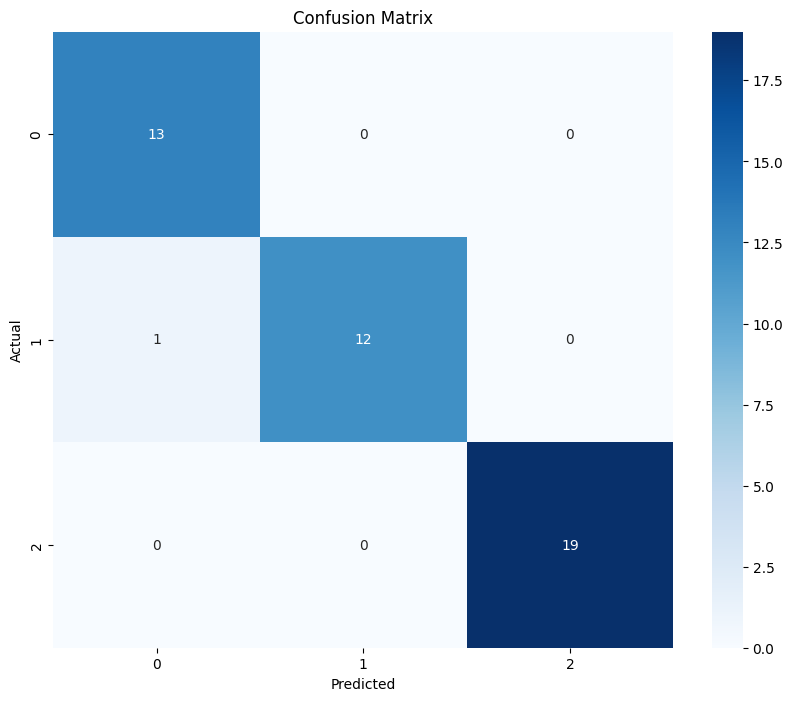

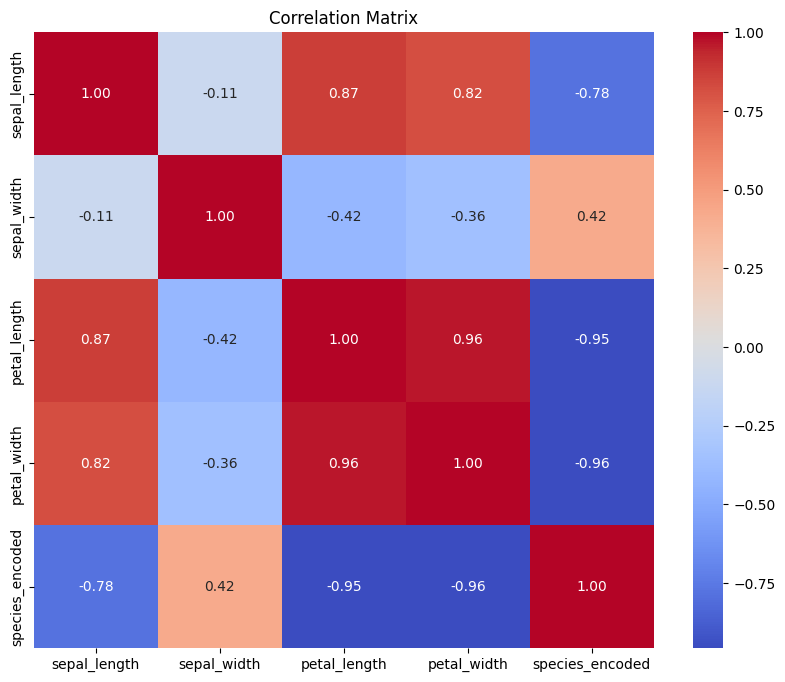

In [ ]:
#Libraries used here are already imported above
nb_classifier = GaussianNB()
y_pred = nb_classifier.fit(X_train, y_train).predict(X_test)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Correlation matrix
corr_matrix = df2_encoded.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Inference
Here, we can see from the correlation matrix that the features show some linear-relationship to a little extent but ***the Naive Bayes Classifier works well here compared to Random Forests and GBDts*** or classifiers using other ensemble methods since it is a simple classification where the class label effectively "breaks" the correlations between the features ***exhibiting strong conditional independence***. This aligns with the fundaental principle of the classifier thus showing close to perfect performance.

#Thank You